# Author

Ronen H

# Import Libraries

In [1]:
import os
from tqdm import tqdm
import orjson
import pandas as pd
import matplotlib.pyplot as plt

# Chapters of the Bible Statistics

In [2]:
num_old_testament_verses = []
num_old_testament_chapters = 0

In [3]:
with open('bible_data/old_testament.jsonl', 'rb') as old_testament_file:
    for bible_chapter_line in tqdm(old_testament_file):
        num_old_testament_chapters += 1
        bible_chapter = orjson.loads(bible_chapter_line)
        num_old_testament_verses.append(bible_chapter['num_verses'])

929it [00:00, 16826.92it/s]


In [4]:
num_new_testament_verses = []
num_new_testament_chapters = 0

In [5]:
with open('bible_data/new_testament.jsonl', 'rb') as new_testament_file:
    for bible_chapter_line in tqdm(new_testament_file):
        num_new_testament_chapters += 1
        bible_chapter = orjson.loads(bible_chapter_line)
        num_new_testament_verses.append(bible_chapter['num_verses'])

260it [00:00, 15849.19it/s]


In [6]:
total_verses = num_old_testament_verses.copy()
total_verses.extend(num_new_testament_verses)
total_chapters = num_old_testament_chapters + num_new_testament_chapters

In [7]:
if not os.path.isdir('bible_basic_statistics'):
    os.mkdir('bible_basic_statistics')

In [8]:
basic_stats_df = pd.DataFrame({'Statistic': ['Total - Number of Chapters', 'Total - Number of Verses', 'Total - Number of Verses Per Chapter',
                                             'Old Testament - Number of Chapters', 'Old Testament - Number of Verses', 'Old Testament - Number of Verses Per Chapter',
                                             'New Testament - Number of Chapters', 'New Testament - Number of Verses', 'New Testament - Number of Verses Per Chapter'],
                               'Value': [total_chapters, sum(total_verses), sum(total_verses) / total_chapters,
                                         num_old_testament_chapters, sum(num_old_testament_verses), sum(num_old_testament_verses) / num_old_testament_chapters,
                                         num_new_testament_chapters, sum(num_new_testament_verses), sum(num_new_testament_verses) / num_new_testament_chapters]})
basic_stats_df.to_csv('bible_basic_statistics/chapter_statistics.csv', index=None)
basic_stats_df

,Statistic,Value
0,Total - Number of Chapters,1189.000000
1,Total - Number of Verses,31102.000000
2,Total - Number of Verses Per Chapter,26.158116
3,Old Testament - Number of Chapters,929.000000
4,Old Testament - Number of Verses,23145.000000
5,Old Testament - Number of Verses Per Chapter,24.913886
6,New Testament - Number of Chapters,260.000000
7,New Testament - Number of Verses,7957.000000
8,New Testament - Number of Verses Per Chapter,30.603846


# Relevance Score Distribution

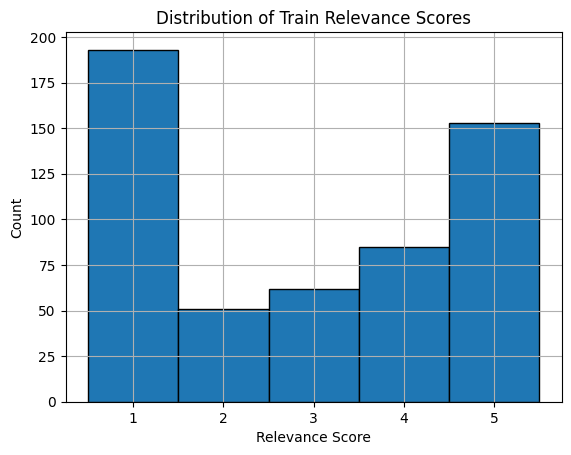

In [9]:
train_queries_df = pd.read_csv('bible_queries_relevances/train_queries_relevances.csv')
train_queries_df['relevance'].hist(bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], edgecolor='black')
plt.xlabel('Relevance Score')
plt.ylabel('Count')
plt.title('Distribution of Train Relevance Scores')
plt.savefig('bible_basic_statistics/train_rel_scores_dist.jpg', dpi=500, bbox_inches='tight')
plt.show()

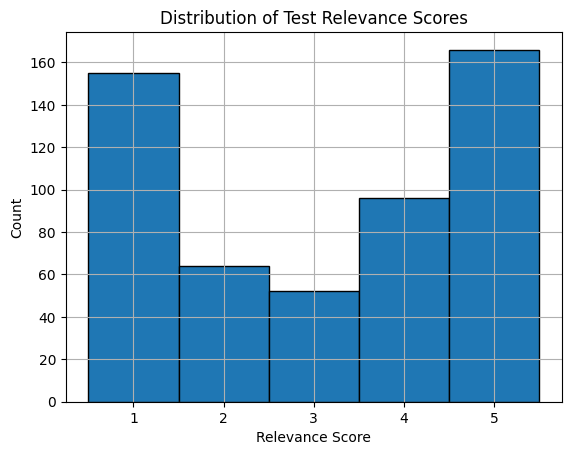

In [10]:
test_queries_df = pd.read_csv('bible_queries_relevances/test_queries_relevances.csv')
test_queries_df['relevance'].hist(bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], edgecolor='black')
plt.xlabel('Relevance Score')
plt.ylabel('Count')
plt.title('Distribution of Test Relevance Scores')
plt.savefig('bible_basic_statistics/test_rel_scores_dist.jpg', dpi=500, bbox_inches='tight')
plt.show()